# Explore here

In [24]:
#BIBLIOTECAS
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [5]:
#CARGAR DATOS

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep =";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#ANALISIS Y LIMPIEZA DEL DF

df.isnull().sum()
#No hay NAs

df.duplicated().sum()
df[df.duplicated(keep=False)]
#veo los duplicados

dfd= df.drop_duplicates()

dfd.head()

dfd.nunique()
#Compruebo si hay alguna columna con valor constante, algunas son tipo Y/N por lo que tienen 2 pero no hay columnas constantes 

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [12]:
#NORMALIZACIÓN DE LOS DATOS Y CAMBIO DE CUALITATIVOS A CUANTITATIVOS 

dfd.loc[:, "job_n"] = pd.factorize(dfd["job"])[0]
dfd.loc[:, "marital_n"] = pd.factorize(dfd["marital"])[0]
dfd.loc[:, "education_n"] = pd.factorize(dfd["education"])[0]
dfd.loc[:, "default_n"] = pd.factorize(dfd["default"])[0]
dfd.loc[:, "housing_n"] = pd.factorize(dfd["housing"])[0]
dfd.loc[:, "loan_n"] = pd.factorize(dfd["loan"])[0]
dfd.loc[:, "contact_n"] = pd.factorize(dfd["contact"])[0]
dfd.loc[:, "month_n"] = pd.factorize(dfd["month"])[0]
dfd.loc[:, "day_of_week_n"] = pd.factorize(dfd["day_of_week"])[0]
dfd.loc[:, "poutcome_n"] = pd.factorize(dfd["poutcome"])[0]
dfd.loc[:, "y_n"] = pd.factorize(dfd["y"])[0]

#He tenido que poner .loc porque me advertía que podia no estar realizandose en la localización adecuada (??)

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dfd[num_variables])
df_escalado= pd.DataFrame(scal_features, index = dfd.index, columns = num_variables)
df_escalado.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [13]:
#TRAIN Y TEST

X = df_escalado.drop("y_n", axis=1) 
y = df_escalado["y_n"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Utiliza chi2 porque las variables son categóricas en su mayoria (la objeto y las predictoras) y porque no hay nums negativos y k=5 porque tiene un 0.85

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
selec = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[selec])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[selec])

X_train_sel.head()


,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980503,1.000000
1,0.0,0.0,1.000000,0.958966,1.000000
2,0.0,0.0,1.000000,0.981410,1.000000
3,0.0,0.0,0.937500,0.958059,0.859735
4,0.0,0.0,0.333333,0.148946,0.512287


In [9]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


0.9023797960174842


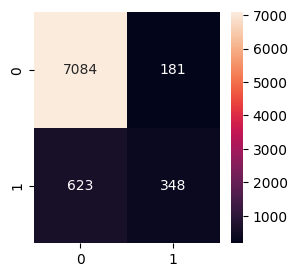

In [23]:
#REGRESIÓN LOGÍSTICA

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))



matriz = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(matriz)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

#La matriz de confusión muestra que el modelo tiene una gran sensibilidad pero no es muy preciso
#La score sale a 0.90, una puntución tan alta puede indicr que el modelo puede tener overfitting por lo que hay que optimizarlo ajustando la C
#Las predicciones que arrojaría este modelo sin optimizar serían demasiado optimistas, ya que la tendencia es al yes.

In [26]:
#OPTIMIZACIÓN

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy:.7f}")

#Tanto C=0.001 como C=0.01 tienen el mismo nivel de precisión (0.8821030) y menos tampoco da menos valor de precisión
#Se buscan los mejores hiperparámtros
hiperparametros = {"C": [0.001, 0.01, 0.1, 1, 10, 100],"penalty": ["l1", "l2", "elasticnet", None], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],'max_iter': [100, 200, 500]}
grid = GridSearchCV(model, hiperparametros, scoring = "accuracy", cv = 5)
grid

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#Para evitar las advertencias, esto lo he p
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Accuracy with C=0.001: 0.8821030
Accuracy with C=0.01: 0.8821030
Accuracy with C=0.1: 0.8901166
Accuracy with C=1: 0.8886595
Accuracy with C=10: 0.8885381
Accuracy with C=100: 0.8885381
Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'penalty': None, 'solver': 'sag'}


0.9038368139873725


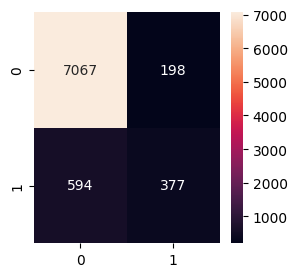

In [29]:
#Optimizar el modelo 
model_op = LogisticRegression(C= 0.01, max_iter= 100, penalty= None, solver= 'sag')
model_op.fit(X_train, y_train)

#Comprobar como funciona el modelo optimizado

y_pred = model_op.predict(X_test)
print(accuracy_score(y_test, y_pred))



matriz_op = confusion_matrix(y_test, y_pred)
cm_df_op = pd.DataFrame(matriz_op)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df_op, annot=True, fmt="d")
plt.show()